In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from parser.recipe_parser import RecipeConstraintParser

df = pd.read_csv('pp_recipes.csv')
print("Dataset Shape:", df.shape)

parser = RecipeConstraintParser()

C:\Users\Roni Karppinen\AppData\Local\Temp\ipykernel_19392\1490157508.py:6: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pp_recipes.csv')


Dataset Shape: (507335, 37)


In [27]:
df.shape

(507335, 37)

In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(5)

,Unnamed: 0,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,food_kg_locator,recipe_url,tags,new_recipe_id,new_author_id,average_rating,number_of_ratings,servingsPerRecipe,servingSize [g],calories [cal],caloriesFromFat [cal],totalFat [g],saturatedFat [g],cholesterol [mg],sodium [mg],totalCarbohydrate [g],dietaryFiber [g],sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
0,0,447642,Cranberry-Orange Caramel Corn,"Taken from Beter Homes and Gardens, November 2010.",409184,40.0,"['Preheat oven to 275 degrees. In a very large bowl combine the popped popcorn, cranberries and almonds; set aside.', 'In a 2-quart saucepan cook and stir the butter, brown sugar and corn syrup over medium heat until butter is melted.', 'Stir in orange juice. Bring to boiling over medium heat.', 'Boil at a moderate, steady rate for 2 minutes.', 'Remove from heat. Stir in vanilla and baking soda (mixture will foam up).', 'Pour the syrup mixture over the popcorn mixture in bowl; stir to coat well.', 'Transfer to a 15x10x1 inch baking pan or shallow raosting pan.', 'Bake for 30 minutes, stirring twice.', 'Transfer caramel corn to a large sheet of greased heavy foil; cool.']","{'': [('popcorn, popped', '12 time(s) cups '), ('dried cranberries', '1 time(s) cup '), ('whole almond', '0.5 time(s) cup '), ('butter', '0.5 time(s) cup '), ('brown sugar, packed', '0.5 time(s) cup '), ('corn syrup (light color)', '0.25 time(s) cup '), ('orange juice', '2 time(s) tablespoons '), ('vanilla', '2 time(s) teaspoons '), ('baking soda', '0.5 time(s) teaspoon ')]}",20,2011-01-29,http://idea.rpi.edu/heals/kb/recipe/5e6ae80d-Cranberry-Orange%20Caramel%20Corn,https://www.food.com/recipe/cranberry-orange-caramel-corn-447642,NaN,0,4589,0.0,0,20,30.0,97.2,57.0,6.4,3.0,12.2,73.8,9.9,0.7,6.9,0.8,9,9,0.168254,0.000,0.00,NaN,"['http://idea.rpi.edu/heals/kb/ingredientname/baking%20soda', 'http://idea.rpi.edu/heals/kb/ingredientname/brown%20sugar', 'http://idea.rpi.edu/heals/kb/ingredientname/butter', 'http://idea.rpi.edu/heals/kb/ingredientname/corn%20syrup', 'http://idea.rpi.edu/heals/kb/ingredientname/dried%20cranberries', 'http://idea.rpi.edu/heals/kb/ingredientname/orange%20juice', 'http://idea.rpi.edu/heals/kb/ingredientname/popcorn', 'http://idea.rpi.edu/heals/kb/ingredientname/vanilla', 'http://idea.rpi.edu/heals/kb/ingredientname/whole%20almonds']","['baking soda', 'brown sugar', 'butter', 'corn syrup', 'dried cranberries', 'orange juice', 'popcorn', 'vanilla', 'whole almonds']"
1,1,53662,Cocktail De Camarones,"I ordered shrimp cocktail at a Mexican restaurant not knowing what I was going to get but loving both Mexican food and shrimp I figured it would be good. It was delicious. So after a few attempts of creating this dish at home I finally got it right, and we have been enjoying it ever since. My boyfriend and I make a meal out of it.",64251,20.0,"['After you chop the tomatoes, onions and cilantro mix together in a bowl, add the diced jalapeno pepper.', 'Add about 1-1/2 cups of tomato juice (V-8 is what I like to use).', ""Then add about 2 tablespoons or more to taste of lime juice (lemon juice will do if you don't have lime and fresh is always better) Add garlic salt to taste do the same to the salt and pepper."", 'Add the shrimp and avocado.', 'Do a taste test to see if you may need to add one or more of the above ingredients.', 'Cover and refrigerate about an hour or until ready to serve.', 'Serve with crackers.']","{'': [('shelled and cooked shrimp (50-60 count is good)', '1 -2 time(s) lb '), ('large tomatoes, chopped', '2 -3 time(s) '), ('small white onions, chopped or 2 green onions', '0.5 time(s) '), ('cilantro, slightly chopped', '0.5 time(s) cup '), ('jalapeno, diced, with seeds', '0.5 time(s) '), ('avocado, chopped', '1 time(s) '), ('tomato juice', ' time(s) '), ('lime juice', ' time(s) '), ('salt and pepper', ' ti

In [29]:
df.columns

Index(['Unnamed: 0', 'recipe_id', 'title', 'description', 'author_id',
       'duration', 'directions', 'ingredients', 'serves', 'last_changed_date',
       'food_kg_locator', 'recipe_url', 'tags', 'new_recipe_id',
       'new_author_id', 'average_rating', 'number_of_ratings',
       'servingsPerRecipe', 'servingSize [g]', 'calories [cal]',
       'caloriesFromFat [cal]', 'totalFat [g]', 'saturatedFat [g]',
       'cholesterol [mg]', 'sodium [mg]', 'totalCarbohydrate [g]',
       'dietaryFiber [g]', 'sugars [g]', 'protein [g]', 'direction_size',
       'ingredients_sizes', 'who_score', 'fsa_score', 'nutri_score',
       'normalization_comment', 'ingredient_food_kg_urls',
       'ingredient_food_kg_names'],
      dtype='object')

In [30]:
## 1

print("NUTRITIONAL DISTRIBUTIONS")
nutritional_cols = ['calories [cal]', 'protein [g]', 'sodium [mg]']
for col in nutritional_cols:
    if col in df.columns:
        stats = df[col].describe()
        print(f"{col}: Mean={stats['mean']:.1f}, Median={stats['50%']:.1f}, Std={stats['std']:.1f}")

print("\nDURATION ANALYSIS")
duration_clean = df['duration'].dropna()
quick_recipes = (duration_clean < 20).sum()
long_recipes = (duration_clean > 60).sum()
total_duration = len(duration_clean)

print(f"Quick recipes (<20 min): {quick_recipes} ({quick_recipes/total_duration*100:.1f}%)")
print(f"Long recipes (>60 min): {long_recipes} ({long_recipes/total_duration*100:.1f}%)")
print(f"Duration - Mean: {duration_clean.mean():.1f} min, Median: {duration_clean.median():.1f} min")

NUTRITIONAL DISTRIBUTIONS
calories [cal]: Mean=482.9, Median=316.5, Std=1406.9
protein [g]: Mean=17.4, Median=9.1, Std=39.8
sodium [mg]: Mean=761.3, Median=352.2, Std=4076.2

DURATION ANALYSIS
Quick recipes (<20 min): 97682 (19.5%)
Long recipes (>60 min): 135780 (27.2%)
Duration - Mean: 64.8 min, Median: 40.0 min


In [31]:
print("TOP 5 TAGS:")
all_tags = []

for tag_string in df["tags"].dropna():
    if str(tag_string).startswith("["):
        tags = str(tag_string).strip("[]").replace("'", "").split(", ")
        all_tags.extend(tags)

tag_counts = {}
for tag in all_tags:
    tag_counts[tag] = tag_counts.get(tag, 0) + 1

sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)
for i, (tag, count) in enumerate(sorted_tags[:5]):
    print(f"{i+1}. {tag}: {count} recipes")

print(f"\nTotal unique tags: {len(tag_counts)}")

TOP 5 TAGS:
1. preparation: 229584 recipes
2. time-to-make: 224383 recipes
3. course: 217315 recipes
4. main-ingredient: 170001 recipes
5. dietary: 164578 recipes

Total unique tags: 552
1. preparation: 229584 recipes
2. time-to-make: 224383 recipes
3. course: 217315 recipes
4. main-ingredient: 170001 recipes
5. dietary: 164578 recipes

Total unique tags: 552


In [32]:
df["serves"].unique()

array(['20', '2-4', '5', '10-12', '4', '8', '12', '1-20', '2', '4-6', '6',
       '18', '6-8', nan, '1', '8-10', '10', '30', '15', '24', '6-10',
       '15-20', '16', '12-15', '1-2', '40', '4-5', '3-4', '8-12', '7',
       '16-18', '12-16', '2-3', '9', '18-20', '3', '20-24', '64', '38',
       '5-6', '16-20', '32', '4-10', '5-7', '14', '5-10', '10-20', '3-5',
       '100', '3-6', '48', '15-18', '9-16', '34', '1-100', '12-14',
       '15-17', '12-18', '4-8', '25', '6-12', '36', '20-30', '4-12', '92',
       '1210', '1-3', '70', '72', '43', '54', '14-16', '26', '102', '60',
       '27', '1-4', '7-9', '20-25', '84', '45', '13', '16-24', '50', '17',
       '6-9', '8-9', '28', '160', '6-7', '200', '12-24', '12-36', '75',
       '46', '42-48', '49', '24-30', '25-30', '19', '2-6', '15-25',
       '48-60', '120', '22', '192', '60-70', '10-15', '36-48', '9-18',
       '15-24', '400', '25-50', '5-8', '406', '30-32', '40-50', '16-32',
       '81', '7-8', '9-12', '8-16', '11', '10-14', '42', '112'

In [33]:
#examples of problematic rows
df.sort_values("calories [cal]", ascending=False).head()

,Unnamed: 0,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,food_kg_locator,recipe_url,tags,new_recipe_id,new_author_id,average_rating,number_of_ratings,servingsPerRecipe,servingSize [g],calories [cal],caloriesFromFat [cal],totalFat [g],saturatedFat [g],cholesterol [mg],sodium [mg],totalCarbohydrate [g],dietaryFiber [g],sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
2740,2740,264817,How to Make Corned Beef,"An heirloom, butchering-time recipe impractical for most modern cooks. From the Pennsylvania Dutch chapter of the United States Regional Cookbook, Culinary Arts Institute of Chicago, 1947. Posting it as a historical novelty.",64642,NaN,"['Scrub a good oak barrel thoroughly.', 'Put as much fresh-killed beef as desired to be corned in the barrel and cover with cold water, covering by two inches.', 'Let stand for 48 hours.', 'Drain off the water and measure before discarding.', 'Measure the same amount of cold water (spring water, preferably) and to every gallon of water formerly used, add the above proportions of salt sugar and saltpeter.', 'Boil for 15 minutes and skim.', 'When cold, pour over the beef.', 'Place a heavy weight on meet to keep it under the brine.', 'Store in a cool cellar.', 'The corned beef will be ready to use after ten days.']","{'': [('beef (this amount is approximate)', '200 time(s) lbs '), ('water', ' time(s) '), ('fine salt', '1 1/2 time(s) lbs '), ('brown sugar', '0.5 time(s) lb '), ('saltpeter', '0.5 time(s) ounce ')]}",NaN,2007-11-11,http://idea.rpi.edu/heals/kb/recipe/1a2711b5-How%20to%20Make%20Corned%20Beef,https://www.food.com/recipe/how-to-make-corned-beef-264817,NaN,2740,43,0.00,0,1,91708.0,612854.6,579313.0,64368.1,26740.6,89892.0,287613.6,222.7,0.0,220.2,7454.9,10,5,0.069714,0.00,0.00,NaN,"['http://idea.rpi.edu/heals/kb/ingredientname/butter', 'http://idea.rpi.edu/heals/kb/ingredientname/nuts', 'http://idea.rpi.edu/heals/kb/ingredientname/oatmeal', 'http://idea.rpi.edu/heals/kb/ingredientname/sweetened%20condensed%20milk']","['butter', 'nuts', 'oatmeal', 'sweetened condensed milk']"
439928,439928,193435,Tennessee Moonshine,common moonshine recipe in Tennessee,374913,20.0,"['To boiled cornmeal add yeast and lots of sugar.', 'Let the mash ferment.', 'once fermented cook the mash.']","{'': [('cornmeal', '50 time(s) lbs '), ('natural bran (optional)', '10 time(s) lbs '), ('sugar', '200 time(s) lbs '), ('yeast', '12 time(s) ounces '), ('gallons water', '200 time(s) ')]}",1,2013-01-31,http://idea.rpi.edu/heals/kb/recipe/d9abe0ee-Tennessee%20Moonshine,https://www.food.com/recipe/tennessee-moonshine-193435,"['30-minutes-or-less', 'time-to-make', 'course', 'preparation', 'for-1-or-2', 'low-protein', 'healthy', '5-ingredients-or-less', 'beverages', 'easy', 'low-fat', 'dietary', 'low-sodium', 'low-cholesterol', 'low-saturated-fat', 'low-calorie', 'low-in-something', 'number-of-servings', '3-steps-or-less']",439928,300015,0.00,3,1,876698.0,434360.2,7567.0,840.8,118.0,0.0,31777.7,108294.6,1748.6,90682.3,1980.8,3,5,0.147510,0.00,0.25,NaN,NaN,NaN
209569,209569,519856,Italian Mint Lamb,"Saucy and succulent mint Lamb, best sided with Sweet potato chips and freshly cooked garden Peas. My family loved this and make sure i do this every Tuesday, when they give me a chance i will upload a picture! :) Happy Cooking and please let me know what you think and how it turned out for you.",1803395015,80.0,"['Put The Chutney into a mixing bowl.', 'mix in all the spices.', 'Mix in the Mint Leaves (Please remember if you picked them from your garden like me to WASH the leaves from any bugs or dirt!).', 'Put In the Fridge to sit for a little bit.', ""While that's sitting for a bit we can pre heat the oven to 200 Degrees Celsius."", 'Peal the Sweet Potatos.', 'Remove the marinade from the fridge as well as your tablespoon of butter.', 'Find a decent size baking tray fo

99th percentile - Protein: 1030.4g, Calories: 18970.0

Extreme protein outliers (51 recipes):
                                title  protein [g]
2740          How to Make Corned Beef       7454.9
7895       Maple Apple Roasted Turkey       1114.6
8244               Roast Suckling Kid       1033.4
8825   Grandmag's Baked Christmas Ham       2106.8
13950           Hot Chocolate Dry Mix       1122.6

Extreme calorie outliers (51 recipes):
                                                   title  calories [cal]
2740                             How to Make Corned Beef        612854.6
8825                      Grandmag's Baked Christmas Ham         23343.1
13950                              Hot Chocolate Dry Mix         25248.7
26227                         Easy, Easy Friendship Cake         40159.2
29786  High Energy Double-Nut Tweety Treat for the Birds         26811.8


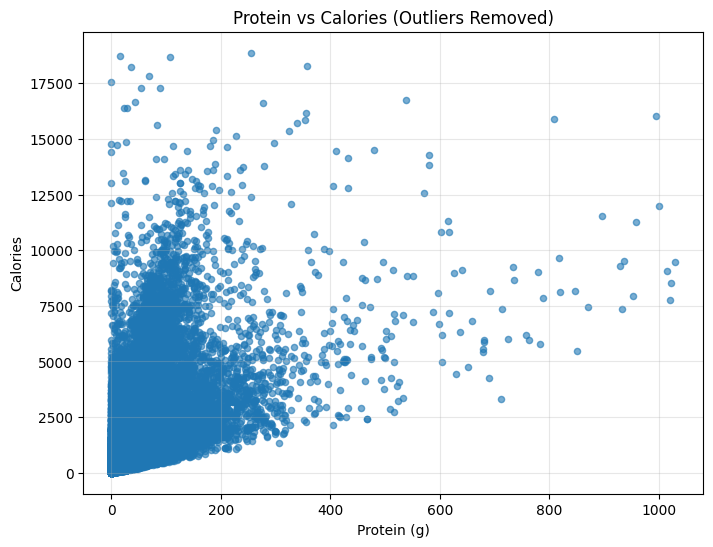

In [34]:
protein = df["protein [g]"].dropna()
calories = df["calories [cal]"].dropna()

p99_protein = protein.quantile(0.9999)
p99_calories = calories.quantile(0.9999)

print(f"99th percentile - Protein: {p99_protein:.1f}g, Calories: {p99_calories:.1f}")

extreme_protein = df[df["protein [g]"] > p99_protein]
extreme_calories = df[df["calories [cal]"] > p99_calories]

print(f"\nExtreme protein outliers ({len(extreme_protein)} recipes):")
if len(extreme_protein) > 0:
    print(extreme_protein[["title", "protein [g]"]].head())

print(f"\nExtreme calorie outliers ({len(extreme_calories)} recipes):")
if len(extreme_calories) > 0:
    print(extreme_calories[["title", "calories [cal]"]].head())

mask = (df["protein [g]"] <= p99_protein) & (df["calories [cal]"] <= p99_calories)
df = df[mask]

plt.figure(figsize=(8, 6))
plt.scatter(df["protein [g]"], df["calories [cal]"], alpha=0.6, s=20)
plt.xlabel("Protein (g)")
plt.ylabel("Calories")
plt.title("Protein vs Calories (Outliers Removed)")
plt.grid(True, alpha=0.3)
plt.show()

In [35]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [36]:
# import random
# import pandas as pd
# from typing import Dict, Any, List, Callable, Tuple

def create_single_turn_example(instruction: str, df_filtered, parser, max_results: int = None) -> Dict[str, Any]:
    """Create a single-turn training example in instruct format."""
    constraints = parser.parse(instruction)
    
    # Pick a random subset when limiting results
    if max_results:
        try:
            if len(df_filtered) <= max_results:
                results = df_filtered
            else:
                results = df_filtered.sample(n=max_results, replace=False)
        except Exception:
            results = df_filtered.head(max_results)
    else:
        results = df_filtered
    
    # Extract recipe IDs for evidence
    evidence_ids = results['recipe_id'].tolist()
    
    # Format output with recipe details
    output_parts = []
    for i, (_, row) in enumerate(results.iterrows()):
        parts = [f"{i+1}) {row['title']}"]
        
        # Add relevant nutritional info based on constraints
        if 'max_calories' in constraints or 'min_calories' in constraints:
            parts.append(f"{row['calories [cal]']:.1f} kcal")
        if 'max_protein' in constraints or 'min_protein' in constraints:
            parts.append(f"{row['protein [g]']:.1f} g protein")
        if 'max_sodium' in constraints or 'min_sodium' in constraints:
            parts.append(f"{row['sodium [mg]']:.1f} mg sodium")
        if 'max_carbs' in constraints or 'min_carbs' in constraints:
            parts.append(f"{row['totalCarbohydrate [g]']:.1f} g carbs")
        if 'max_sugar' in constraints or 'min_sugar' in constraints:
            parts.append(f"{row['sugars [g]']:.1f} g sugar")
        if 'max_fat' in constraints or 'min_fat' in constraints:
            parts.append(f"{row['totalFat [g]']:.1f} g fat")
        if 'max_duration' in constraints:
            parts.append(f"{int(row['duration'])} min")
        
        output_parts.append("—".join(parts))
    
    output = "; ".join(output_parts)
    
    return {
        "instruction": instruction,
        "input": "",
        "output": output,
        "constraints": constraints,
        "evidence_ids": evidence_ids
    }


NUM_TO_WORD = {1: "one", 2: "two", 3: "three", 4: "four", 5: "five"}

TAG_POOLS = {
    'diet': [('vegetarian', 'vegetarian'), ('gluten-free', 'gluten-free'), ('vegan', 'vegan'), ('low-carb', 'low-carb')],
    'meal': [('breakfast', 'breakfast'), ('lunch', 'lunch'), ('dinner', 'dinner'), ('dessert', 'dessert')],
    'misc': [('family-friendly', 'family-friendly'), ('quick', 'quick')],
    'macronutrient': [('protein', 'protein'), ('carbohydrate', 'carbohydrate'), ('fat', 'fat')]
}

def random_calorie_limit(low=True):
    return random.choice([250, 300, 350, 400]) if low else random.choice([500, 600, 700, 800, 900])

def random_protein_min():
    return random.choice([15, 20, 25, 30])

def random_carb_max():
    return random.choice([10, 15, 20, 30, 40, 50, 60])

def random_sodium_max():
    return random.choice([300, 400, 500, 600, 700])

def random_duration_max():
    return random.choice([15, 20, 30, 45, 60, 75, 90, 120])

def random_rating_min():
    return random.choice([3.0, 3.5, 4.0, 4.5])

def random_serves():
    return random.choice([('4-6', '4-6|4|6'), ('6-8', '6-8|6|8'), ('8-10', '8-10|8|10'), ('10-12', '10-12|10|12')]) 

QueryFunc = Callable[[pd.DataFrame], pd.DataFrame]
# Templates
def _template_1(num_results: int) -> Tuple[str, QueryFunc]:
    num_word = NUM_TO_WORD.get(num_results, str(num_results))
    tag_val, tag_name = random.choice(TAG_POOLS['diet'])
    cal_limit = random_calorie_limit(low=True)
    sod_limit = random_sodium_max()
    dur_limit = random_duration_max()
    
    instruction = (f"Find {num_word} quick {tag_name} lunches under {cal_limit} kcal "
                   f"with less than {sod_limit} mg sodium and under {dur_limit} minutes.")
    
    query_func = lambda df: df[
        (df["tags"].str.contains(tag_val, case=False, na=False)) &
        (df["calories [cal]"] < cal_limit) &
        (df["sodium [mg]"] < sod_limit) &
        (df["duration"] < dur_limit)
    ]
    return instruction, query_func

def _template_2(num_results: int) -> Tuple[str, QueryFunc]:
    num_word = NUM_TO_WORD.get(num_results, str(num_results))
    tag_val, tag_name = random.choice(TAG_POOLS['meal'][:3]) # breakfast, lunch, or dinner
    prot_limit = random_protein_min()
    dur_limit = random_duration_max()
    
    instruction = (f"Find {num_word} high-protein {tag_name}s over {prot_limit}g protein "
                   f"in under {dur_limit} minutes.")
    
    query_func = lambda df: df[
        (df["tags"].str.contains(tag_val, case=False, na=False)) &
        (df["protein [g]"] > prot_limit) &
        (df["duration"] < dur_limit)
    ]
    return instruction, query_func

def _template_3(num_results: int) -> Tuple[str, QueryFunc]:
    num_word = NUM_TO_WORD.get(num_results, str(num_results))
    tag_val, tag_name = random.choice([('dinner', 'dinner'), ('lunch', 'lunch')])
    carb_limit = random_carb_max()
    prot_limit = random_protein_min()
    
    instruction = (f"Find {num_word} low-carb {tag_name}s under {carb_limit}g total carbohydrates "
                   f"with at least {prot_limit}g protein.")
                   
    query_func = lambda df: df[
        (df["tags"].str.contains(tag_val, case=False, na=False)) &
        (df["totalCarbohydrate [g]"] < carb_limit) &
        (df["protein [g]"] >= prot_limit)
    ]
    return instruction, query_func

def _template_4(num_results: int) -> Tuple[str, QueryFunc]:
    num_word = NUM_TO_WORD.get(num_results, str(num_results))
    cal_limit = random_calorie_limit(low=True)
    sug_limit = random.choice([10, 15, 20, 25])
    fat_limit = random.choice([3, 5, 8]) # Saturated fat limits
    
    instruction = (f"Find {num_word} desserts under {cal_limit} kcal with less than "
                   f"{sug_limit}g sugar and low saturated fat (under {fat_limit}g).")
                   
    query_func = lambda df: df[
        (df["tags"].str.contains("dessert", case=False, na=False)) &
        (df["calories [cal]"] < cal_limit) &
        (df["sugars [g]"] < sug_limit) &
        (df["saturatedFat [g]"] < fat_limit)
    ]
    return instruction, query_func

def _template_5(num_results: int) -> Tuple[str, QueryFunc]:
    num_word = NUM_TO_WORD.get(num_results, str(num_results))
    tag_val, tag_name = random.choice([('gluten-free', 'gluten-free'), ('vegetarian', 'vegetarian'), ('vegan', 'vegan')])
    rating = random_rating_min()
    dur_limit = random_duration_max()
    
    instruction = (f"Find {num_word} highly-rated {tag_name} recipes with at least "
                   f"{rating} stars and under {dur_limit} minutes.")
                   
    query_func = lambda df: df[
        (df["tags"].str.contains(tag_val, case=False, na=False)) &
        (df["average_rating"] >= rating) &
        (df["duration"] < dur_limit)
    ]
    return instruction, query_func

def _template_6(num_results: int) -> Tuple[str, QueryFunc]:
    num_word = NUM_TO_WORD.get(num_results, str(num_results))
    tag_val, tag_name = random.choice([('dinner', 'dinner'), ('family-friendly', 'family-friendly')])
    serves_display, serves_regex = random_serves()
    cal_min = random.randint(250, 350)
    cal_max = random.randint(500, 650)
    
    instruction = (f"Find {num_word} {tag_name} recipes that serve {serves_display} people "
                   f"with moderate calories (between {cal_min} and {cal_max} kcal).")
                   
    query_func = lambda df: df[
        (df["tags"].str.contains(tag_val, case=False, na=False)) &
        (df["serves"].str.contains(serves_regex, case=False, na=False, regex=True)) &
        (df["calories [cal]"] < cal_max) &
        (df["calories [cal]"] > cal_min)
    ]
    return instruction, query_func

def generate_random_examples(df: pd.DataFrame, parser: Any, num_examples: int, num_results_per_example: int) -> List[Dict[str, Any]]:
    """
    Generates a list of randomized training examples based on the 6 templates.
    """
    
    # Our templates
    template_generators = [
        _template_1, _template_2, _template_3,
        _template_4, _template_5, _template_6
    ]
    
    examples = []
    attempts = 0
    max_attempts = num_examples * 5
    
    print(f"Attempting to generate {num_examples} examples...")
    
    while len(examples) < num_examples and attempts < max_attempts:
        # Pick template
        template_func = random.choice(template_generators)
        
        instruction, query_func = template_func(num_results_per_example)
        results = query_func(df)
        
        # Create example if results found
        if not results.empty:
            # Format the answer
            example = create_single_turn_example(
                instruction=instruction,
                df_filtered=results,
                parser=parser,
                max_results=num_results_per_example
            )
            examples.append(example)
        attempts += 1

    if len(examples) < num_examples:
        print(f"Failed to generate all the examples. Generated {len(examples)} out of {num_examples}.")
              
    print(f"Successfully generated {len(examples)} examples.")
    return examples



def create_multi_turn_example(conversation: List[str], df_filtered, parser, max_results: int = None) -> Dict[str, Any]:
    """Create a multi-turn training example in chat format."""
    # Parse conversation to extract constraints
    constraints = parser.parse_conversation(conversation)
    
    # When limiting results, pick a random subset rather than always taking the top rows.
    if max_results:
        try:
            if len(df_filtered) <= max_results:
                results = df_filtered
            else:
                results = df_filtered.sample(n=max_results, replace=False)
        except Exception:
            results = df_filtered.head(max_results)
    else:
        results = df_filtered
    
    # Extract recipe IDs for evidence
    evidence_ids = results['recipe_id'].tolist()
    
    # Format final assistant response
    output_parts = []
    for i, (_, row) in enumerate(results.iterrows()):
        parts = [f"{i+1}) {row['title']}"]
        
        # Add relevant nutritional info based on constraints
        if 'max_calories' in constraints or 'min_calories' in constraints:
            parts.append(f"{row['calories [cal]']:.1f} kcal")
        if 'max_protein' in constraints or 'min_protein' in constraints:
            parts.append(f"{row['protein [g]']:.1f} g protein")
        if 'max_sodium' in constraints or 'min_sodium' in constraints:
            parts.append(f"{row['sodium [mg]']:.1f} mg sodium")
        if 'max_carbs' in constraints or 'min_carbs' in constraints:
            parts.append(f"{row['totalCarbohydrate [g]']:.1f} g carbs")
        if 'max_sugar' in constraints or 'min_sugar' in constraints:
            parts.append(f"{row['sugars [g]']:.1f} g sugar")
        if 'max_duration' in constraints:
            parts.append(f"{int(row['duration'])} min")
        
        output_parts.append("—".join(parts))
    
    final_output = "; ".join(output_parts)
    
    # Build messages in OpenAI chat format
    messages = []
    for i, msg in enumerate(conversation):
        role = "user" if i % 2 == 0 else "assistant"
        messages.append({"role": role, "content": msg})
    
    # Add final assistant response with recipes
    messages.append({"role": "assistant", "content": final_output})
    
    return {
        "messages": messages,
        "constraints": constraints,
        "evidence_ids": evidence_ids
    }

# --- New: randomized multi-turn generator (parallels single-turn generator) ---
import random

def _mt_template_1(num_results: int):
    # Quick diet lunch follow-up flow
    num_word = NUM_TO_WORD.get(num_results, str(num_results))
    tag_val, tag_name = random.choice(TAG_POOLS['diet'])
    cal_limit = random_calorie_limit(low=True)
    sod_limit = random_sodium_max()
    dur_limit = random_duration_max()

    conversation = [
        f"Show {tag_name} lunch options.",
        "Do you have any calorie or sodium preferences?",
        f"Under {cal_limit} kcal and less than {sod_limit} mg, please."
    ]

    query_func = lambda df: df[
        (df["tags"].str.contains(tag_val, case=False, na=False)) &
        (df["calories [cal]"] < cal_limit) &
        (df["sodium [mg]"] < sod_limit) &
        (df["duration"] < dur_limit)
    ]

    return conversation, query_func


def _mt_template_2(num_results: int):
    num_word = NUM_TO_WORD.get(num_results, str(num_results))
    tag_val, tag_name = random.choice(TAG_POOLS['meal'][:3])
    prot_limit = random_protein_min()
    dur_limit = random_duration_max()

    conversation = [
        f"I need {tag_name} ideas.",
        "What's your time constraint and {nutrient} goal?",
        f"Under {dur_limit} minutes, at least {prot_limit}g."
    ]

    query_func = lambda df: df[
        (df["tags"].str.contains(tag_val, case=False, na=False)) &
        (df["protein [g]"] > prot_limit) &
        (df["duration"] < dur_limit)
    ]

    return conversation, query_func


def _mt_template_3(num_results: int):
    num_word = NUM_TO_WORD.get(num_results, str(num_results))
    tag_val, tag_name = random.choice([('dinner', 'dinner'), ('lunch', 'lunch')])
    carb_limit = random_carb_max()
    prot_limit = random_protein_min()

    conversation = [
        f"Find {tag_name} ideas.",
        "Are you looking for low-carb options?",
        f"Yes — under {carb_limit}g carbs and at least {prot_limit}g protein."
    ]

    query_func = lambda df: df[
        (df["tags"].str.contains(tag_val, case=False, na=False)) &
        (df["totalCarbohydrate [g]"] < carb_limit) &
        (df["protein [g]"] >= prot_limit)
    ]

    return conversation, query_func


def _mt_template_4(num_results: int):
    cal_limit = random_calorie_limit(low=True)
    sug_limit = random.choice([10, 15, 20, 25])
    fat_limit = random.choice([3, 5, 8])

    conversation = [
        "What desserts do you recommend?",
        "Are you looking for low-calorie or low-sugar?",
        f"Low-calorie, under {cal_limit} kcal, and low saturated fat (under {fat_limit}g)."
    ]

    query_func = lambda df: df[
        (df["tags"].str.contains("dessert", case=False, na=False)) &
        (df["calories [cal]"] < cal_limit) &
        (df["sugars [g]"] < sug_limit) &
        (df["saturatedFat [g]"] < fat_limit)
    ]

    return conversation, query_func


def _mt_template_5(num_results: int):
    conversation = [
        "Show me chicken recipes.",
        "Would you prefer grilled, baked, or any particular style?",
        "Something quick and low-carb, under 20g carbs."
    ]

    query_func = lambda df: df[
        (df["tags"].str.contains("chicken", case=False, na=False)) &
        (df["totalCarbohydrate [g]"] < 20) &
        (df["duration"] < 30)
    ]

    return conversation, query_func


def _mt_template_6(num_results: int):
    conversation = [
        "I want to make soup.",
        "Any dietary restrictions or sodium concerns?",
        "Yes, low sodium under 400 mg and vegetarian."
    ]

    query_func = lambda df: df[
        (df["tags"].str.contains("soup", case=False, na=False)) &
        (df["tags"].str.contains("vegetarian", case=False, na=False)) &
        (df["sodium [mg]"] < 400)
    ]

    return conversation, query_func


MT_TEMPLATES = [_mt_template_1, _mt_template_2, _mt_template_3, _mt_template_4, _mt_template_5, _mt_template_6]


def generate_random_multi_turn_examples(df: Any, parser: Any, num_examples: int, num_results_per_example: int) -> List[Dict[str, Any]]:
    """Generate randomized multi-turn training examples using simple conversation templates."""
    examples: List[Dict[str, Any]] = []
    attempts = 0
    max_attempts = num_examples * 8

    print(f"Attempting to generate {num_examples} multi-turn examples...")

    while len(examples) < num_examples and attempts < max_attempts:
        template_func = random.choice(MT_TEMPLATES)
        conversation, query_func = template_func(num_results_per_example)
        results = query_func(df)

        if not results.empty:
            example = create_multi_turn_example(conversation=conversation, df_filtered=results, parser=parser, max_results=num_results_per_example)
            examples.append(example)
        attempts += 1

    if len(examples) < num_examples:
        print(f"Failed to generate all the multi-turn examples. Generated {len(examples)} out of {num_examples}.")

    print(f"Successfully generated {len(examples)} multi-turn examples.")
    return examples

In [37]:
%pip install scikit-learn
import json
from typing import List, Dict, Any
from sklearn.model_selection import train_test_split


# Generate 100 Single-Turn Examples (unchanged)
single_turn_examples = generate_random_examples(df, parser, num_examples=50, num_results_per_example=4)
print(single_turn_examples)

# Generate Multi-Turn Examples using the new randomized generator
multi_turn_examples = generate_random_multi_turn_examples(df, parser, num_examples=30, num_results_per_example=4)
print(multi_turn_examples)


# Split data 80/10/10 ensuring no recipe ID leakage
def split_data_by_recipe_id(examples: List[Dict], train_ratio=0.8, val_ratio=0.1, random_state=42):
    """
    Split data ensuring no recipe IDs appear in multiple splits.
    Removes examples with overlapping recipe IDs from val/test sets.
    """
    random.seed(random_state)
    
    shuffled = examples.copy()
    random.shuffle(shuffled)
    
    total = len(shuffled)
    train_size = int(total * train_ratio)
    val_size = int(total * val_ratio)
    
    train = shuffled[:train_size]
    val = shuffled[train_size:train_size + val_size]
    test = shuffled[train_size + val_size:]
    
    train_ids = set()
    for ex in train:
        train_ids.update(ex.get('evidence_ids', []))
    
    val_filtered = []
    for ex in val:
        ex_ids = set(ex.get('evidence_ids', []))
        if not ex_ids & train_ids:  # No overlap
            val_filtered.append(ex)
    
    val_ids = set()
    for ex in val_filtered:
        val_ids.update(ex.get('evidence_ids', []))
    
    excluded_ids = train_ids | val_ids
    test_filtered = []
    for ex in test:
        ex_ids = set(ex.get('evidence_ids', []))
        if not ex_ids & excluded_ids:  # No overlap
            test_filtered.append(ex)
    
    test_ids = set()
    for ex in test_filtered:
        test_ids.update(ex.get('evidence_ids', []))
    
    print(f"Original: {total} examples")
    print(f"Train: {len(train)} examples ({len(train_ids)} unique recipes)")
    print(f"Val: {len(val_filtered)} examples ({len(val_ids)} unique recipes) - removed {len(val) - len(val_filtered)}")
    print(f"Test: {len(test_filtered)} examples ({len(test_ids)} unique recipes) - removed {len(test) - len(test_filtered)}")
    
    assert not (train_ids & val_ids), "Train-Val overlap detected!"
    assert not (train_ids & test_ids), "Train-Test overlap detected!"
    assert not (val_ids & test_ids), "Val-Test overlap detected!"
    
    print("✓ No recipe ID leakage between splits")
    
    return train, val_filtered, test_filtered

# Split single-turn data
st_train, st_val, st_test = split_data_by_recipe_id(single_turn_examples)

# Split multi-turn data
mt_train, mt_val, mt_test = split_data_by_recipe_id(multi_turn_examples)

def save_jsonl(data: List[Dict], filename: str):
    """Save data to JSONL format."""
    with open(filename, 'w', encoding='utf-8') as f:
        for item in data:
            f.write(json.dumps(item, ensure_ascii=False) + '\n')

save_jsonl(st_train, 'single_turn_train.jsonl')
save_jsonl(st_val, 'single_turn_val.jsonl')
save_jsonl(st_test, 'single_turn_test.jsonl')

save_jsonl(mt_train, 'multi_turn_train.jsonl')
save_jsonl(mt_val, 'multi_turn_val.jsonl')
save_jsonl(mt_test, 'multi_turn_test.jsonl')

print(f"Single-turn: {len(st_train)} train, {len(st_val)} val, {len(st_test)} test")
print(f"Multi-turn: {len(mt_train)} train, {len(mt_val)} val, {len(mt_test)} test")

print("\n=== Single-Turn Example ===")
print(json.dumps(single_turn_examples[0], indent=2))

print("\n=== Multi-Turn Example ===")
print(json.dumps(multi_turn_examples[0], indent=2))
#



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Attempting to generate 50 examples...
Successfully generated 50 examples.
[{'instruction': 'Find four highly-rated vegetarian recipes with at least 3.0 stars and under 30 minutes.', 'input': '', 'output': '1) Chickpea Salad With Cumin Vinaigrette—10 min; 2) Broccoli Tofu and Peppers in Orange Sauce—20 min; 3) The Easiest Ever Carrot-Sesame Salad—10 min; 4) Tofu Shiitake Spicy Stir-Fry—20 min', 'constraints': {'max_duration': 30.0, 'diet': ['vegetarian'], 'include_ingredients': ['at']}, 'evidence_ids': [220871, 160958, 398603, 204827]}, {'instruction': 'Find four high-protein lunchs over 15g protein in under 20 minutes.', 'input': '', 'output': '1) Gorgonzola Sauce for Pasta—28.2 g protein—15 min; 2) Grape Chicken Salad—22.6 g protein—15 min; 3) Buffalo Wing Tuna Sandwich—62.1 g protein—10 min; 4) Primanti Brothers Sandwich Pittsburgh original!!!—18.6 g protein—5 min', 'constraints': {'min_protein': 15.0, 'max_duration': 